## Load dataset

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pickle

In [2]:
dataset_path = '../dataset/Breast_GSE45827.csv'
df = pd.read_csv(dataset_path, index_col=0)
df.head()

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
samples,,,,,,,,,,,,,,,,,,,,,
84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,9.400056,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


In [3]:
df.info()

print(df.shape)

print(df.type.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 84 to 238
Columns: 54676 entries, type to AFFX-TrpnX-M_at
dtypes: float64(54675), object(1)
memory usage: 63.0+ MB
(151, 54676)
basal        41
HER          30
luminal_B    30
luminal_A    29
cell_line    14
normal        7
Name: type, dtype: int64


Text(0.5, 0, 'Type')

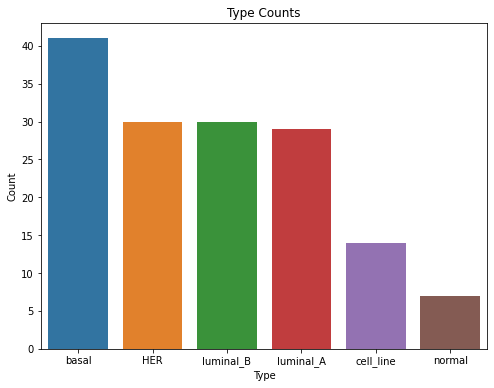

In [4]:
type_counts = df.type.value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title('Type Counts')
plt.ylabel('Count')
plt.xlabel('Type')


## Preprocess data 

In [5]:
df.type.isnull().sum()

0

In [29]:
X = df.drop(columns=['type'])
y = df.type

In [32]:
unique_classes = y.unique()
class_mapping = {label: idx for idx, label in enumerate(unique_classes)}

with open('class_mapping.pickle', 'wb') as handle:
    pickle.dump(class_mapping, handle, protocol=pickle.HIGHEST_PROTOCOL)

print(class_mapping)

{'basal': 0, 'HER': 1, 'cell_line': 2, 'normal': 3, 'luminal_A': 4, 'luminal_B': 5}


In [20]:
y = y.map(class_mapping)

In [21]:
X_norm = (X - X.mean()) / X.std()

### Save normalized dataset

In [10]:
df_norm = pd.concat([X_norm, y], axis=1)
df_norm.head()

# SLOW -> comment out if necessary
# df_norm.describe()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,type
samples,,,,,,,,,,,,,,,,,,,,,
84,-0.796911,0.659647,0.309625,0.041650,-0.982510,-0.669939,-1.221486,-0.990983,0.657097,-1.294768,...,0.079946,-1.416048,-1.016437,-1.581002,-0.793231,-1.346111,0.514171,-0.794485,1.257337,0
85,-0.778462,0.821432,1.297896,1.046861,-0.225184,0.361385,-0.658296,-0.420280,-0.012174,-0.649134,...,-0.037791,-1.056079,-1.042430,-0.991022,-0.473998,-0.817479,0.171697,0.437831,-1.075187,0
87,-0.383771,1.846133,-0.757498,1.053643,-0.373298,-1.164743,-1.731788,-0.936317,0.989070,-0.726807,...,-0.263938,-1.561667,-1.644948,-1.486373,-0.612934,-1.049747,-0.763377,-0.504913,-0.150456,0
90,-0.948782,-0.388926,0.393994,-1.065889,-0.022742,0.766407,0.568727,-0.473632,0.749052,-1.225005,...,-0.281650,-1.083568,-0.909186,-1.179380,-0.587432,-1.152189,1.211560,-0.681094,0.969485,0
91,-1.516959,0.162066,0.726789,-0.017599,-0.096461,0.467561,0.166324,-0.938811,0.978209,-1.109129,...,0.102499,-0.868236,-0.794423,-1.407795,-0.765344,-0.996246,0.402224,-1.227744,0.197039,0


In [11]:
def save_df(df, path, name):
    isExist = os.path.exists(path)
    if not isExist:
        os.makedirs(path)
    
    df.to_csv(path+name+'.csv', index=False)

In [12]:
# save_df(df_norm, path='../dataset/additional/', name='Breast_GSE45827_norm')

## Visualize data

Text(0.5, 0, 'Feature value')

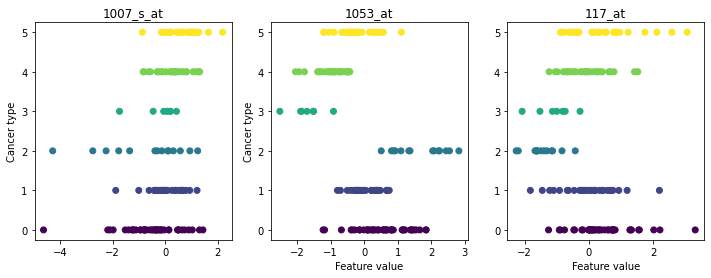

In [13]:
# Plot first feature with color of label
# Make multiple subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
# Plot each feature
axes[0].scatter(x=X_norm.iloc[:, 0], y=y, c=y)
axes[1].scatter(x=X_norm.iloc[:, 1], y=y, c=y)
axes[2].scatter(x=X_norm.iloc[:, 2], y=y, c=y)

# Set titles
axes[0].set_title(X.columns[0])
axes[1].set_title(X.columns[1])
axes[2].set_title(X.columns[2])

# Set axes labels
axes[0].set_ylabel('Cancer type')
axes[1].set_xlabel('Feature value')
axes[1].set_ylabel('Cancer type')
axes[2].set_xlabel('Feature value')


## PCA Analysis

Number of components: 90


Text(0, 0.5, 'Explained variance (%)')

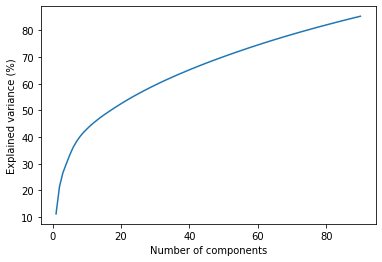

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.85)
pca.fit(X_norm)
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')

plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")


### Show 2 PCA components and check correlation

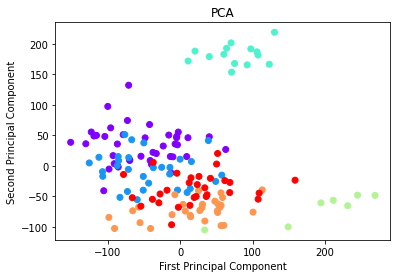

In [15]:
pca = PCA(n_components = 2)
pca.fit(X_norm)
X_pca = pd.DataFrame(pca.transform(X_norm))

# Plot X_pca
plt.title('PCA')
plt.scatter(X_pca[0], X_pca[1], c=y, cmap='rainbow')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

### Show 3 PCA components

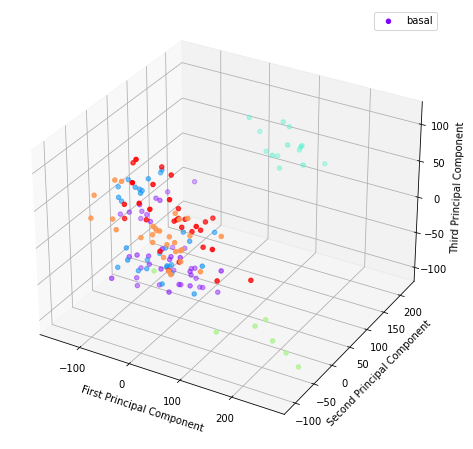

In [16]:
pca = PCA(n_components = 3)
pca.fit(X_norm)
X_pca = pd.DataFrame(pca.transform(X_norm))

# Plot X_pca in 3D
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[0], X_pca[1], X_pca[2], c=y, cmap='rainbow')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')

plt.legend(df.type.unique())
plt.show()

### Save dataframe with N PCA components

In [17]:
def save_pca_df(n_components=2):
    pca = PCA(n_components = n_components)
    pca.fit(X_norm)
    X_pca = pd.DataFrame(pca.transform(X_norm))

    X_pca['type'] = y
    # save_df(X_pca, path='../dataset/additional/', name=f'Breast_GSE45827_pca_{n_components}')

In [18]:
save_pca_df(n_components=10)

## Feature correlation

In [19]:
def correlation_matrices(df, n_features=10):
    # Make multiple subplots
    fig, axes = plt.subplots(n_features, n_features, figsize=(30, 30))
    # Plot each feature
    for i in range(n_features):
        for j in range(n_features):
            axes[i, j].scatter(x=df.iloc[:, i], y=df.iloc[:, j])
            axes[i, j].set_xlabel(df.columns[i])
            axes[i, j].set_ylabel(df.columns[j])

            # Calculate correlation
            corr = df.iloc[:, [i, j]].corr().iloc[0, 1]
            # Set title
            axes[i, j].set_title(f'Correlation: {corr:.2f}')


    fig.suptitle('Correlation between features', fontsize=50, y=0.92)
    plt.show()

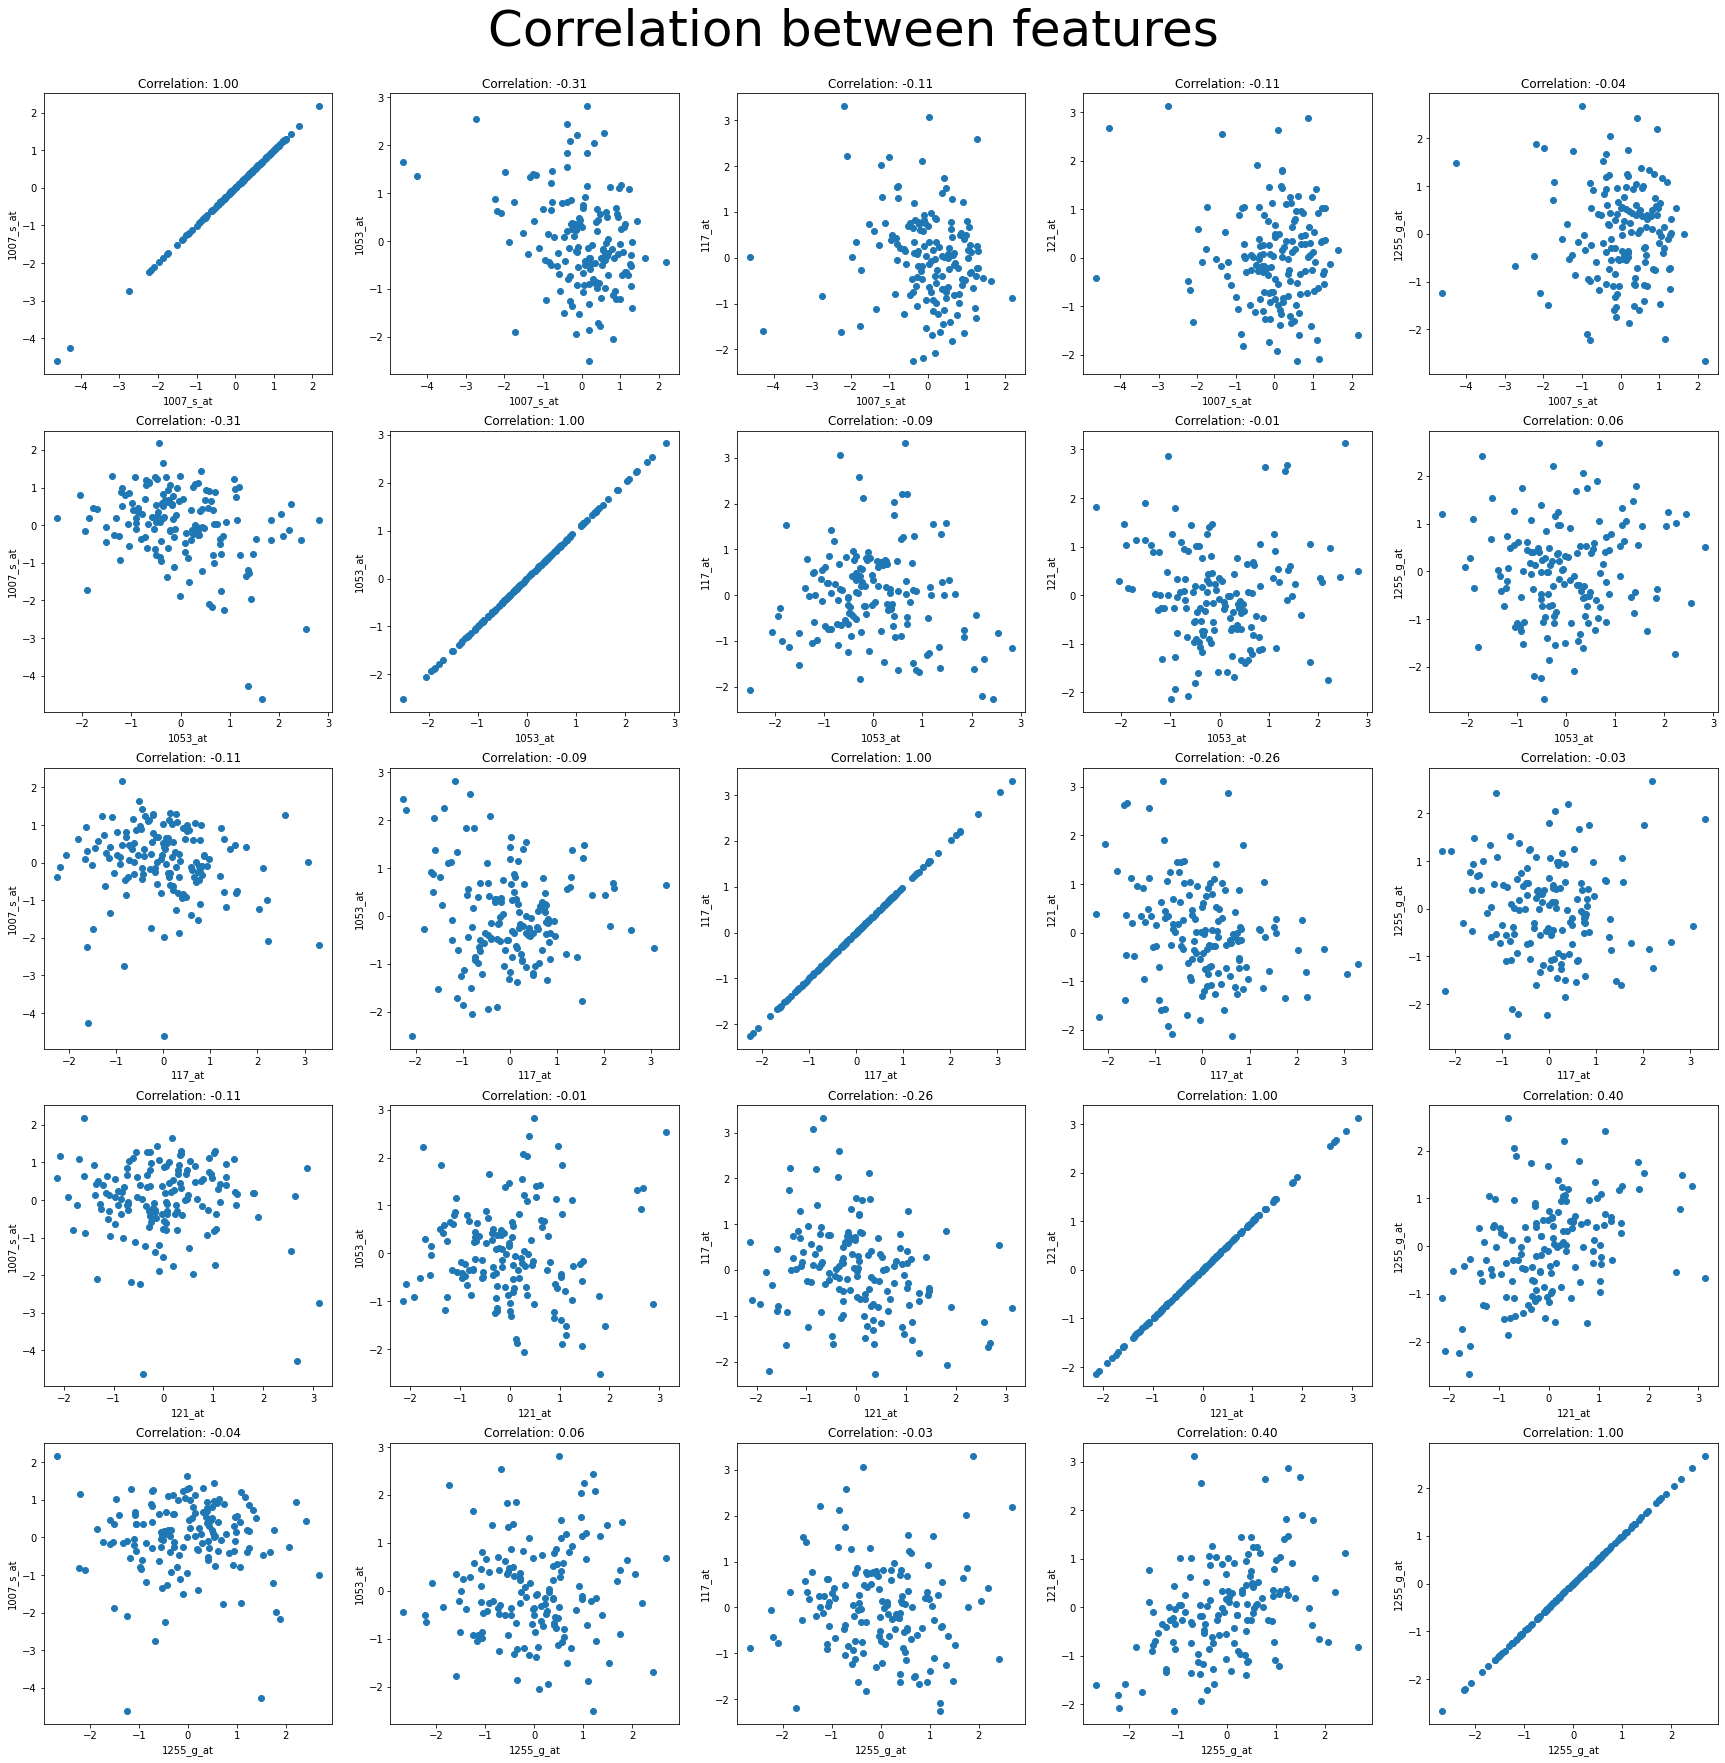

In [20]:
correlation_matrices(X_norm, n_features=5)

In [21]:
def correlated_features(df, n_features=10):
    for i in range(n_features):
        for j in range(i+1, n_features):
            corr = df.iloc[:, [i, j]].corr().iloc[0, 1]
            if corr > 0.9:
                print(f'Correlation between {df.columns[i]} and {df.columns[j]}: {corr:.2f}')

In [22]:
correlated_features(X_norm, n_features=100)

Correlation between 1552288_at and 1552289_a_at: 0.93
Correlation between 1552316_a_at and 1552318_at: 0.92
Correlation between 1552348_at and 1552349_a_at: 0.93
Correlation between 1552365_at and 1552367_a_at: 0.94
Correlation between 1552389_at and 1552390_a_at: 0.91


### Try classification with XGBoost

In [23]:
# XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

c:\Users\Branko\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\Branko\miniconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:27:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.90
